In [1]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib # to save the model

In [2]:
df = pd.read_csv("breast_cancer.csv")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
df.target.value_counts()#unique()

1.0    357
0.0    212
Name: target, dtype: int64

In [4]:
df['target']=df['target'].astype(int)

<AxesSubplot:xlabel='target', ylabel='count'>

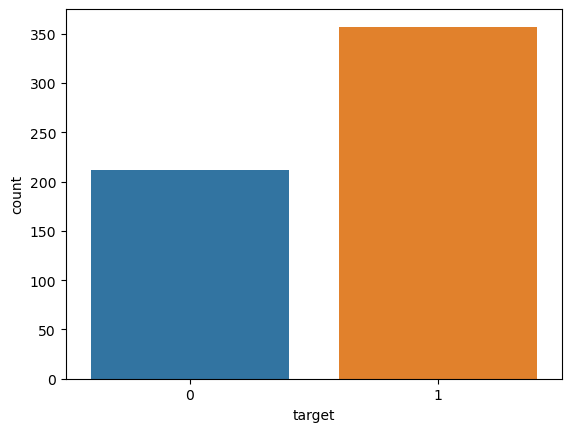

In [5]:
#sns.countplot(df.target)
sns.countplot(x ='target', data = df)

Creating a pair plot between variables

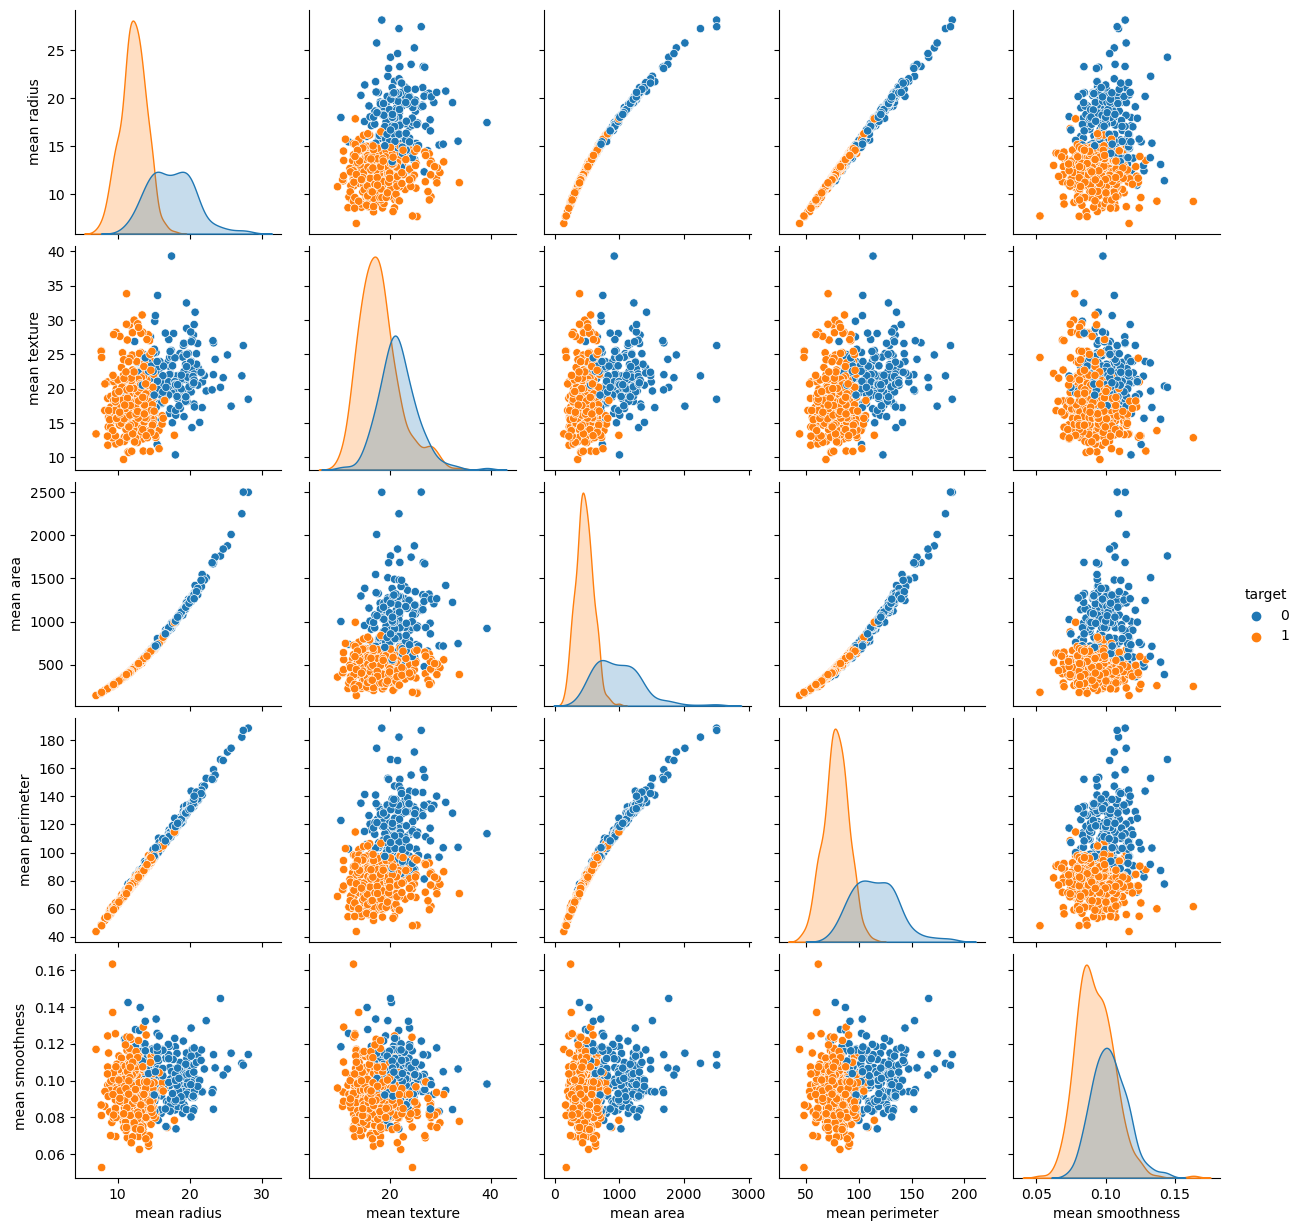

In [6]:
sns.pairplot(df, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

Next is Correlation among the numerical columns

<AxesSubplot:>

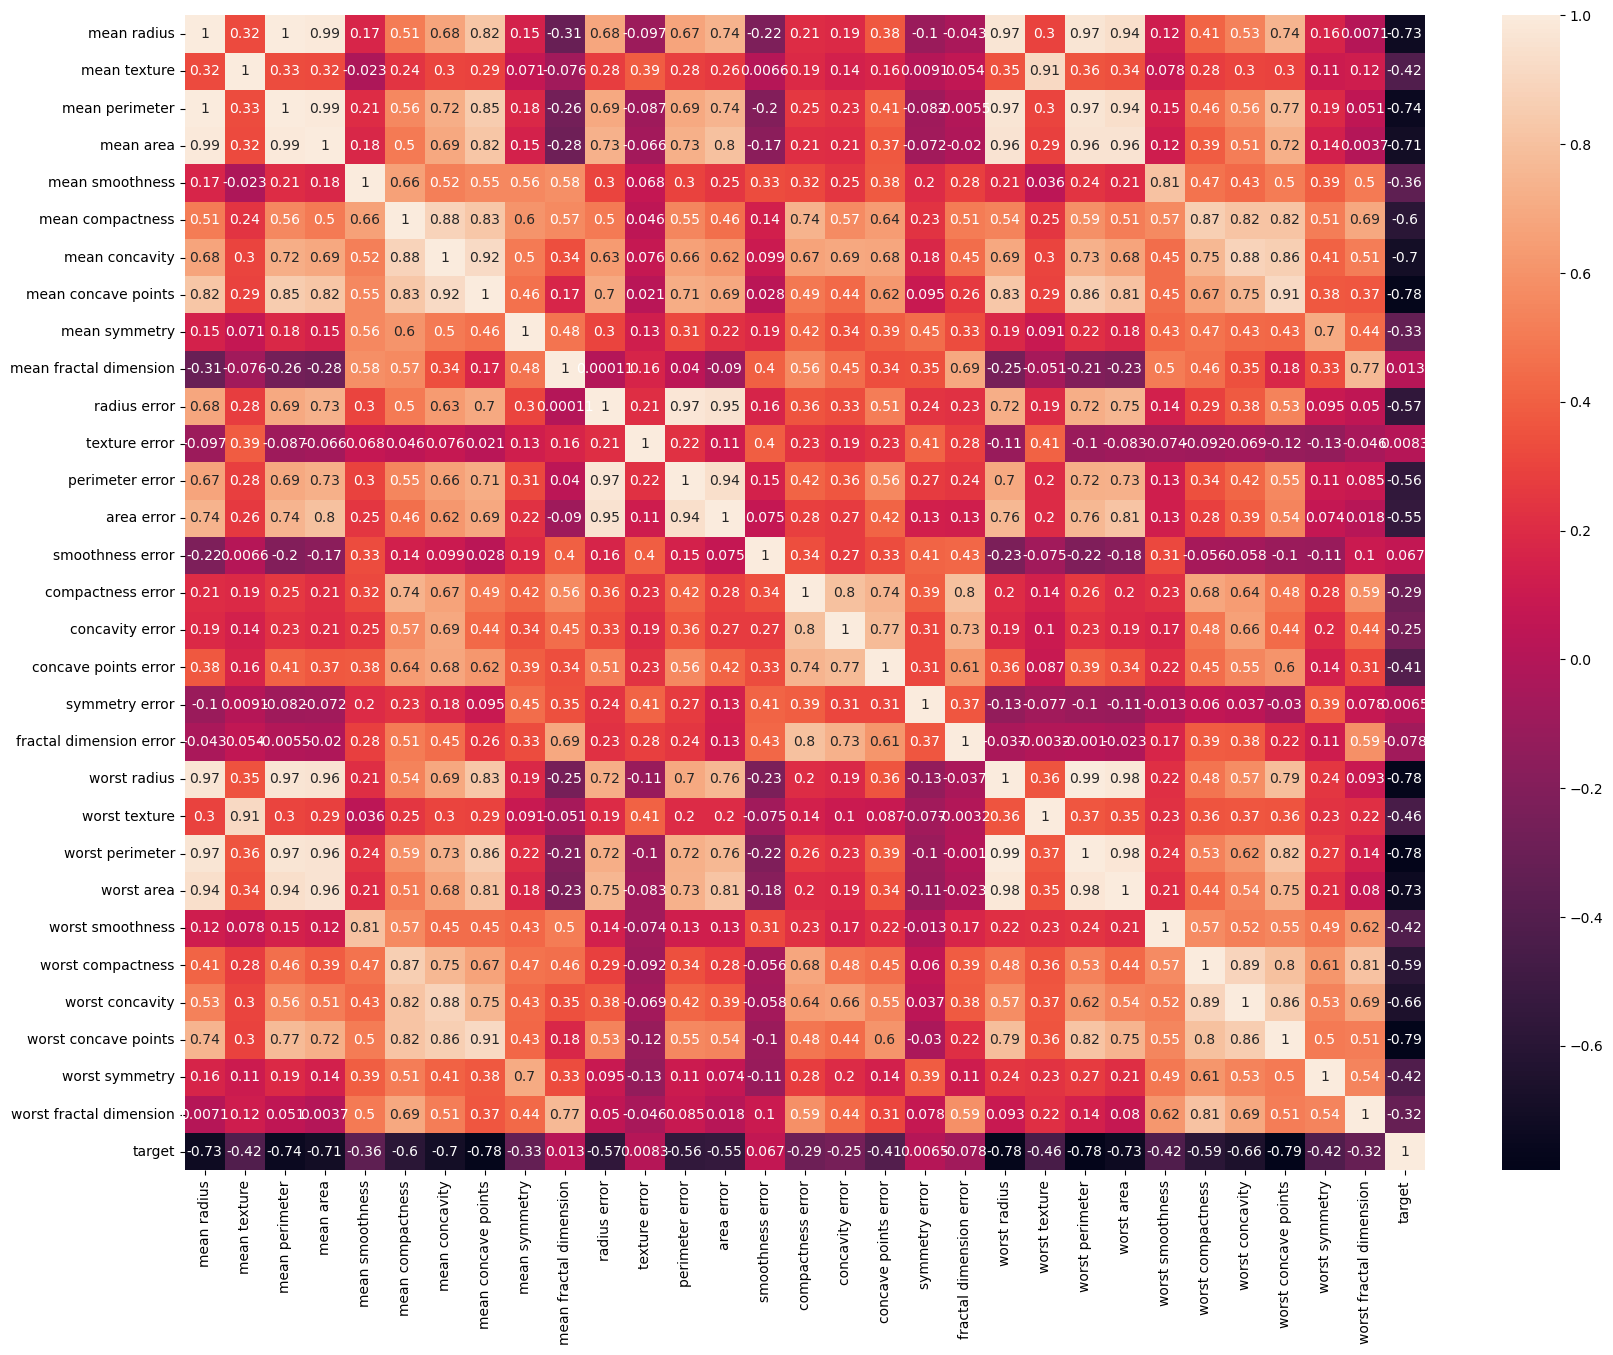

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

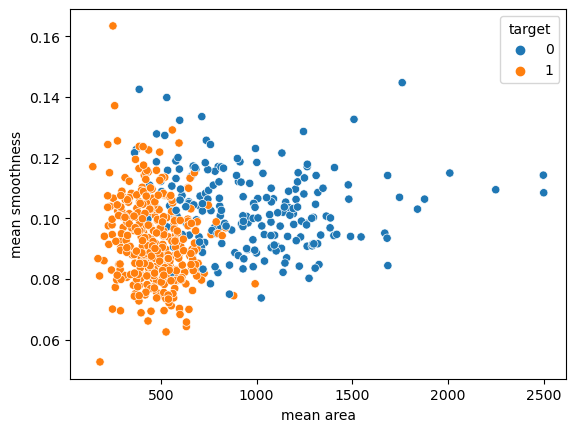

In [8]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df)

In [9]:
y=df['target']
X=df.drop('target',axis=1)

In [10]:
X.shape

(569, 30)

In [28]:
#pip install sklearn

In [11]:
# Importing the function to split the dataset
from sklearn.model_selection import train_test_split

In [12]:
# Splitting the dataset in train and test data with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [13]:
X_train.shape

(455, 30)

In [14]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
306,13.20,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,...,14.41,20.45,92.00,636.9,0.11280,0.1346,0.0112,0.02500,0.2651,0.08385
410,11.36,17.57,72.49,399.8,0.08858,0.05313,0.027830,0.021000,0.1601,0.05913,...,13.05,36.32,85.07,521.3,0.14530,0.1622,0.1811,0.08698,0.2973,0.07745
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.110300,0.057780,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.1963,0.2535,0.09181,0.2369,0.06558
376,10.57,20.22,70.15,338.3,0.09073,0.16600,0.228000,0.059410,0.2188,0.08450,...,10.85,22.82,76.51,351.9,0.11430,0.3619,0.6030,0.14650,0.2597,0.12000
244,19.40,23.50,129.10,1155.0,0.10270,0.15580,0.204900,0.088860,0.1978,0.06000,...,21.65,30.53,144.90,1417.0,0.14630,0.2968,0.3458,0.15640,0.2920,0.07614


In [15]:
y_train.shape

(455,)

In [16]:
# Importing the SVC model from sklearn
from sklearn.svm import SVC

In [17]:
# Importing confusion matrix and classification report to get accuarcy of our model
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
svc_model = SVC()

In [19]:
# fitting the model to the training dataset
svc_model.fit(X_train, y_train)

SVC()

In [20]:
# Predicting the model using the Test dataset
y_pred = svc_model.predict(X_test)

In [23]:
y_pred[0:5]

array([0, 1, 1, 1, 1])

In [24]:
# Creating the confusion matrix
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

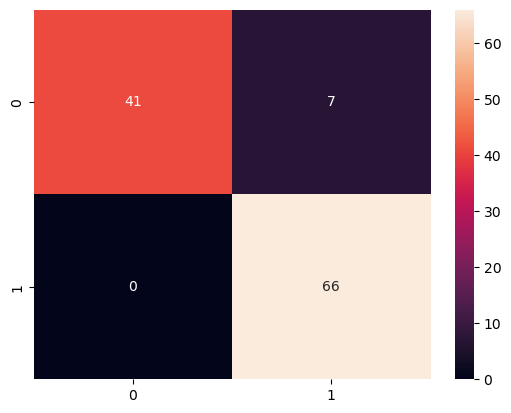

In [25]:
# Visualising the confusion matrix using heatmap
sns.heatmap(cm, annot = True)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        48
           1       0.90      1.00      0.95        66

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



In [29]:
from sklearn.metrics import accuracy_score

In [30]:
print(accuracy_score(y_test,y_pred))

0.9385964912280702


In [21]:
model_filename='model.pkl'
joblib.dump(svc_model,model_filename)

['model.pkl']